In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("~/Downloads/internal1 lab questions/logi2/winequality-white.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
len(data)

4898

In [6]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [57]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

# plot the relationship through graph

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
import seaborn as sns

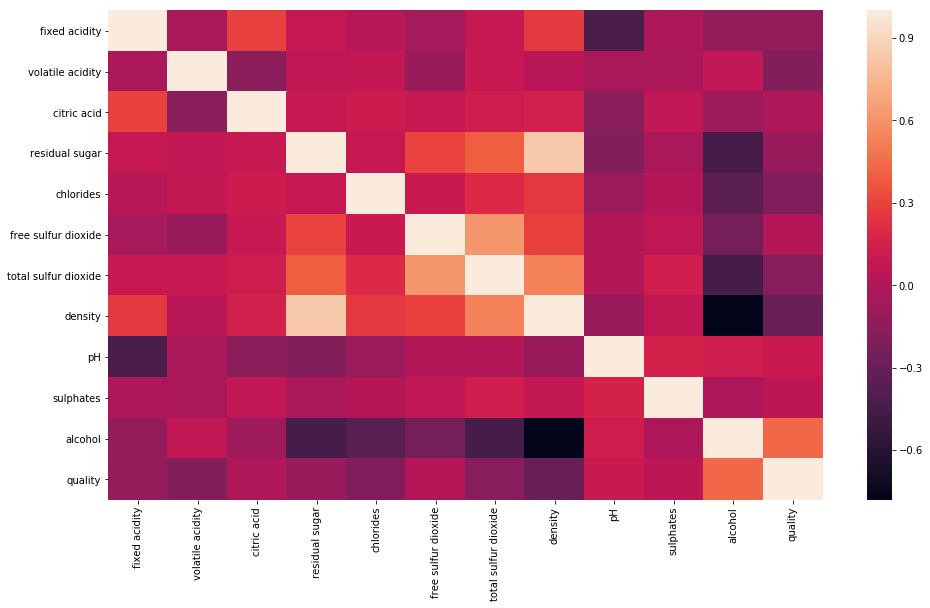

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr())
plt.show()

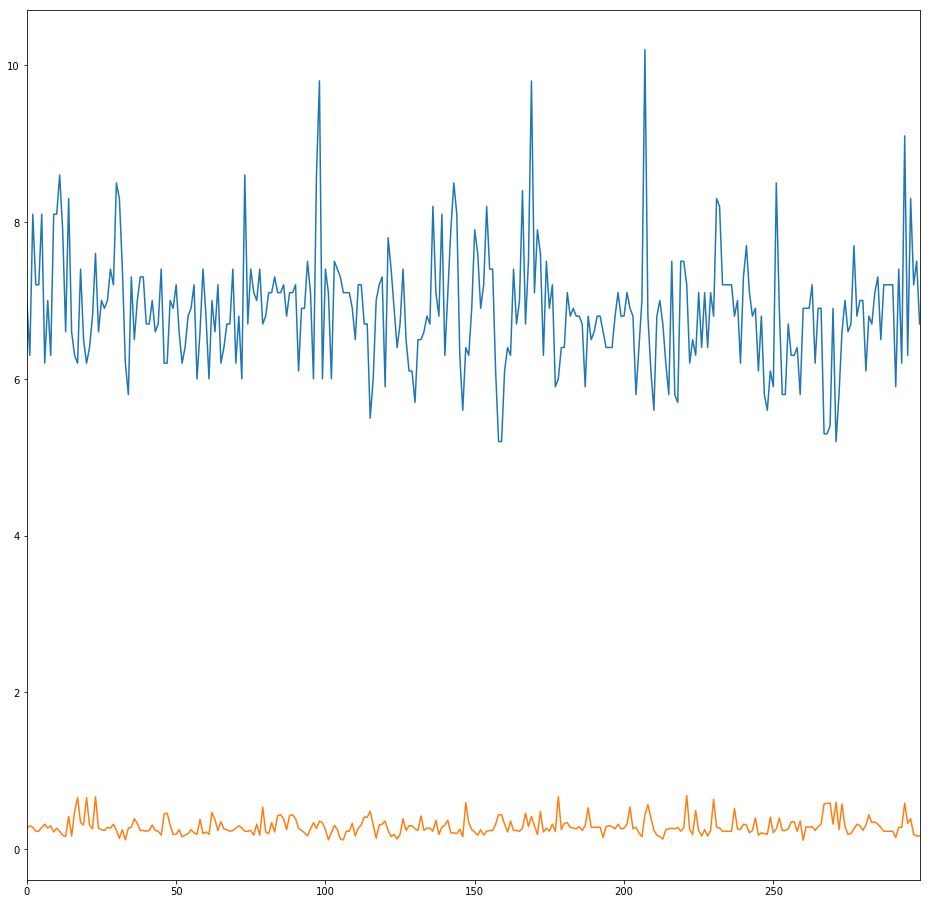

In [16]:
plt.figure(figsize=(16,16))
data['fixed acidity'][:300].plot()
data['volatile acidity'][:300].plot()
plt.show()

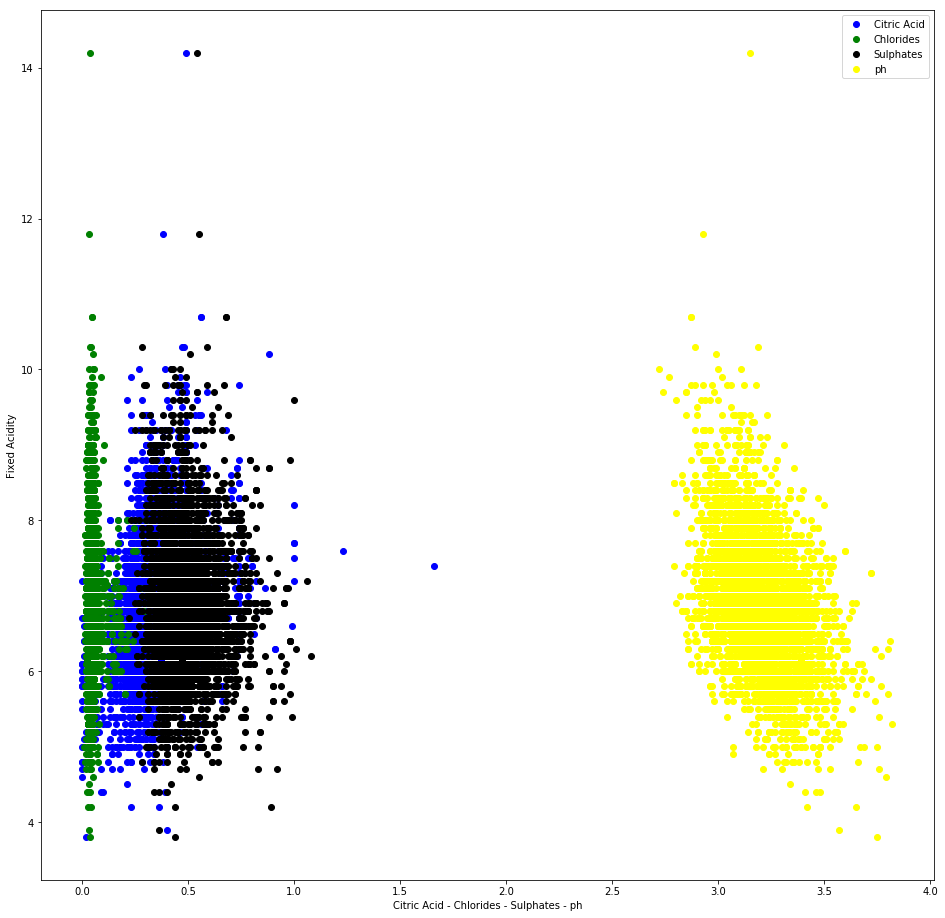

In [58]:
plt.figure(figsize=(16,16))
plt.scatter(data['citric acid'],data['fixed acidity'],color='blue')
plt.scatter(data['chlorides'],data['fixed acidity'],color='green')
plt.scatter(data['sulphates'],data['fixed acidity'],color='black')
#plt.scatter(data['total sulfur dioxide'],data['fixed acidity'] + data['volatile acidity'],color='red')
plt.scatter(data['pH'],data['fixed acidity'],color='yellow')
plt.xlabel('Citric Acid - Chlorides - Sulphates - ph')
plt.ylabel("Fixed Acidity")
plt.legend(('Citric Acid','Chlorides','Sulphates','ph'))
plt.show()

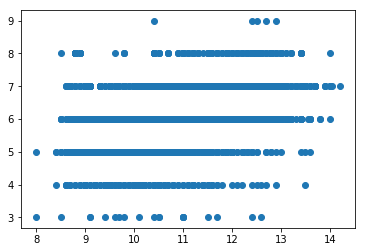

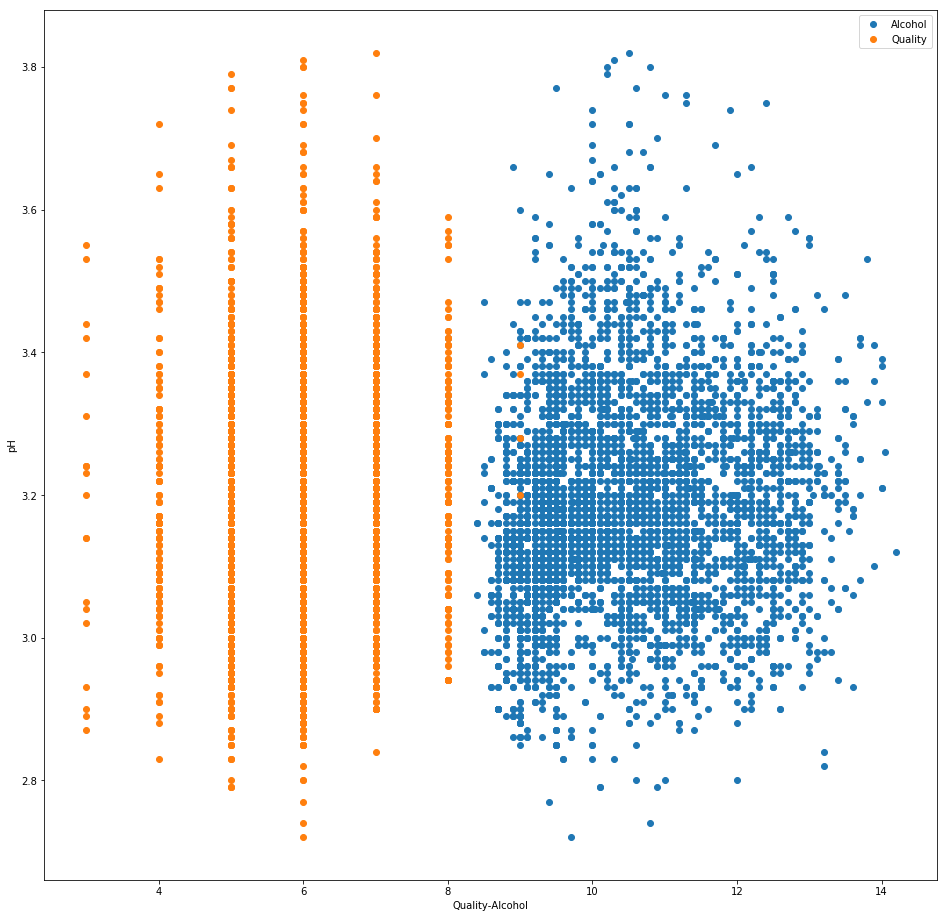

In [40]:
plt.figure(figsize=(16,16))
plt.scatter(data['alcohol'],data['pH'])
plt.scatter(data['quality'],data['pH'])
plt.xlabel('Quality-Alcohol')
plt.ylabel('pH')
plt.legend(('Alcohol','Quality'))
plt.show()

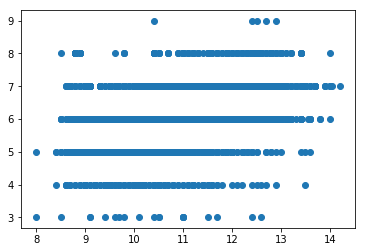

In [45]:
plt.scatter(data['alcohol'],data['quality'])
plt.show()

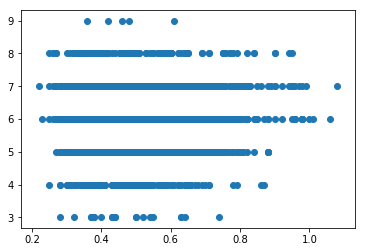

In [78]:
plt.scatter(data['sulphates'],data['quality'])
plt.show()

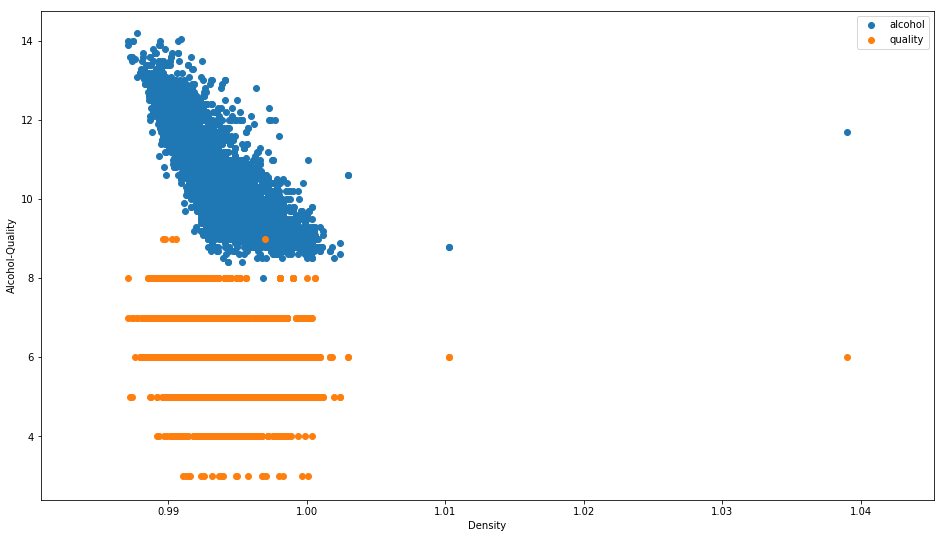

In [76]:
plt.figure(figsize=(16,9))
plt.scatter(data['density'],data['alcohol'])
plt.scatter(data['density'],data['quality'])
plt.xlabel('Density')
plt.ylabel('Alcohol-Quality')
plt.legend()
plt.show()

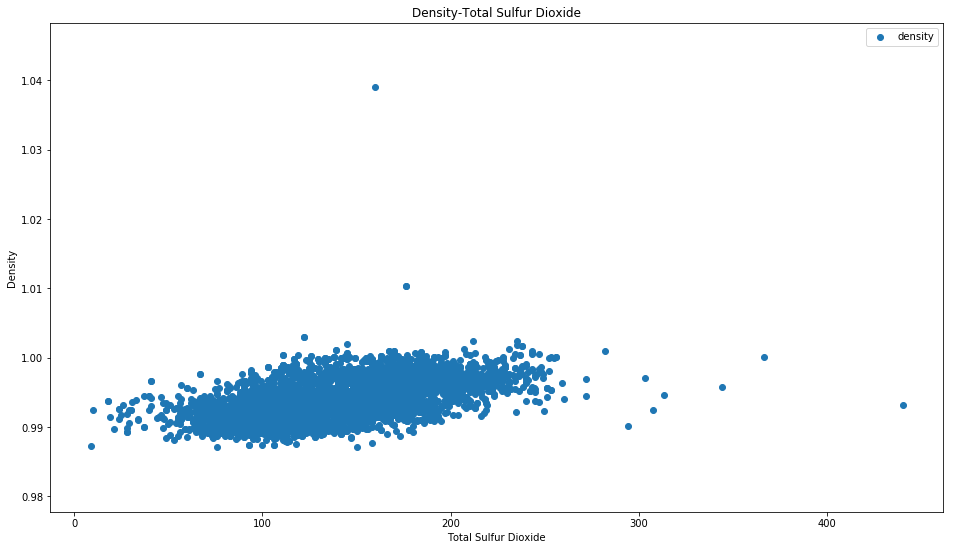

In [32]:
plt.figure(figsize=(16,9))
plt.title('Density-Total Sulfur Dioxide')
plt.scatter(data['total sulfur dioxide'],data['density'])
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Density')
plt.legend()
plt.show()

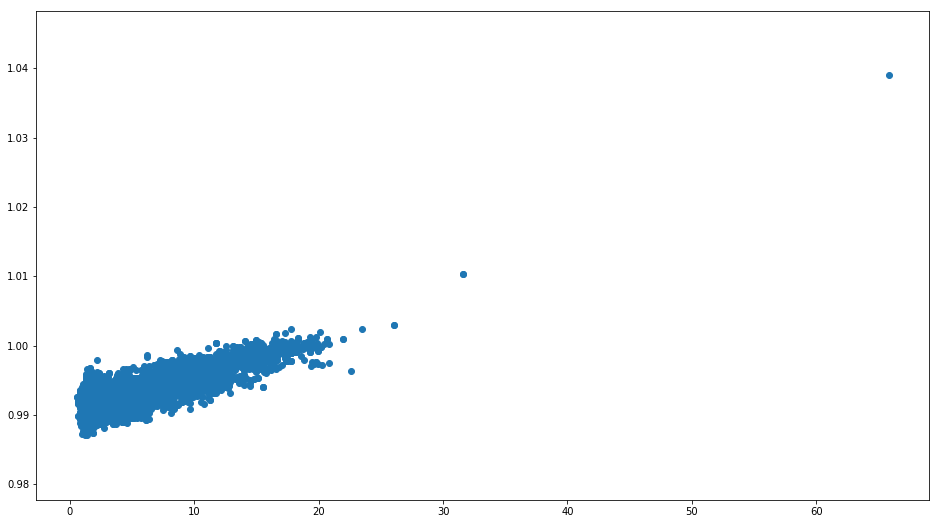

In [39]:
plt.figure(figsize=(16,9))
plt.scatter(data['residual sugar'],data['density'])
plt.show()

# Performing PCA and LCA

In [62]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


1. Take the matrix without the column names
2. Compute the mean for every dimension of the dataset
3. Calculate the covariance matrix of the whole dataset
4. Compute eigenvectors and the corresponding eigenvalues.
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.
6. Use this d × k eigenvector matrix to transform the samples onto the new subspace.

In [146]:
datapca = np.array(data)

In [147]:
datapca

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [148]:
datapca.T

array([[ 7.  ,  6.3 ,  8.1 , ...,  6.5 ,  5.5 ,  6.  ],
       [ 0.27,  0.3 ,  0.28, ...,  0.24,  0.29,  0.21],
       [ 0.36,  0.34,  0.4 , ...,  0.19,  0.3 ,  0.38],
       ...,
       [ 0.45,  0.49,  0.44, ...,  0.46,  0.38,  0.32],
       [ 8.8 ,  9.5 , 10.1 , ...,  9.4 , 12.8 , 11.8 ],
       [ 6.  ,  6.  ,  6.  , ...,  6.  ,  7.  ,  6.  ]])

In [149]:
np.shape(datapca)

(4898, 12)

# checking pca mannually

In [151]:
datapca_mean = np.mean(datapca.T,axis=1)

In [152]:
datapca_mean

array([6.85478767e+00, 2.78241119e-01, 3.34191507e-01, 6.39141486e+00,
       4.57723561e-02, 3.53080849e+01, 1.38360657e+02, 9.94027376e-01,
       3.18826664e+00, 4.89846876e-01, 1.05142670e+01, 5.87790935e+00])

In [153]:
datapca_center = datapca - datapca_mean

In [154]:
datapca_center

array([[ 1.45212332e-01, -8.24111882e-03,  2.58084933e-02, ...,
        -3.98468763e-02, -1.71426705e+00,  1.22090649e-01],
       [-5.54787668e-01,  2.17588812e-02,  5.80849326e-03, ...,
         1.53123724e-04, -1.01426705e+00,  1.22090649e-01],
       [ 1.24521233e+00,  1.75888118e-03,  6.58084933e-02, ...,
        -4.98468763e-02, -4.14267048e-01,  1.22090649e-01],
       ...,
       [-3.54787668e-01, -3.82411188e-02, -1.44191507e-01, ...,
        -2.98468763e-02, -1.11426705e+00,  1.22090649e-01],
       [-1.35478767e+00,  1.17588812e-02, -3.41915067e-02, ...,
        -1.09846876e-01,  2.28573295e+00,  1.12209065e+00],
       [-8.54787668e-01, -6.82411188e-02,  4.58084933e-02, ...,
        -1.69846876e-01,  1.28573295e+00,  1.22090649e-01]])

In [155]:
datapca_con = np.cov(datapca_center)

In [156]:
datapca_con

array([[  96.34841261,  -29.34197309, -104.44852556, ...,  -73.74746129,
         -83.11931732, -111.22582116],
       [ -29.34197309,   38.52829705,   22.41536646, ...,   18.34900995,
          36.22808684,   36.42394588],
       [-104.44852556,   22.41536646,  142.84487823, ...,   91.65835601,
          97.52007221,  137.66413378],
       ...,
       [ -73.74746129,   18.34900995,   91.65835601, ...,   61.3035465 ,
          66.16567286,   91.680498  ],
       [ -83.11931732,   36.22808684,   97.52007221, ...,   66.16567286,
          81.0534117 ,  104.73682517],
       [-111.22582116,   36.42394588,  137.66413378, ...,   91.680498  ,
         104.73682517,  141.00932566]])

In [157]:
values,vectors = np.linalg.eig(datapca_con)

In [158]:
values

array([ 7.46813062e+05+0.00000000e+00j,  7.12284469e+04+0.00000000e+00j,
        8.92041364e+03+0.00000000e+00j, ...,
       -5.32856644e-60+3.45787177e-60j, -5.32856644e-60-3.45787177e-60j,
        1.08979443e-62+0.00000000e+00j])

In [159]:
vectors

array([[ 1.05045183e-02+0.00000000e+00j,  6.85884071e-04+0.00000000e+00j,
        -3.94597542e-02+0.00000000e+00j, ...,
         6.07294529e-19+1.10340904e-17j,  6.07294529e-19-1.10340904e-17j,
        -1.06642228e-17+0.00000000e+00j],
       [-3.08247351e-03+0.00000000e+00j, -2.05153447e-02+0.00000000e+00j,
         1.18980910e-02+0.00000000e+00j, ...,
        -3.18434303e-08+3.07399597e-08j, -3.18434303e-08-3.07399597e-08j,
        -4.33459438e-09+0.00000000e+00j],
       [-1.36834892e-02+0.00000000e+00j,  5.69484085e-03+0.00000000e+00j,
        -7.42871325e-03+0.00000000e+00j, ...,
         5.00022876e-07-4.64002086e-07j,  5.00022876e-07+4.64002086e-07j,
         4.94777186e-08+0.00000000e+00j],
       ...,
       [-8.93248959e-03+0.00000000e+00j,  2.43683140e-03+0.00000000e+00j,
         1.08524354e-02+0.00000000e+00j, ...,
        -3.92277682e-06+2.46688456e-06j, -3.92277682e-06-2.46688456e-06j,
         7.89320936e-07+0.00000000e+00j],
       [-9.97834614e-03+0.00000000e+00j, -8.

In [160]:
vectors_transpose = vectors.T
datapca_final = vectors_transpose.dot(datapca_center)

In [ ]:
datapca_final.T

# pca using sklearn

In [162]:
#using sklearn 
from sklearn.decomposition import PCA

In [163]:
pca = PCA()

In [164]:
pca.fit(datapca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [165]:
print(pca.components_)
print("\n")
print(pca.explained_variance_)

[[ 1.54452453e-03  1.69030937e-04  3.38646756e-04  4.73275083e-02
   9.75793989e-05  2.61872279e-01  9.63853329e-01  3.59706391e-05
   3.36199734e-06  3.40888191e-04 -1.25043553e-02 -3.28041170e-03]
 [-9.16673296e-03 -1.54624759e-03  1.40367326e-04  1.49314295e-02
  -7.20390584e-05  9.64637649e-01 -2.62682018e-01 -1.83976939e-05
  -4.08057870e-05 -3.60533010e-04  6.47965595e-03  1.09933430e-02]
 [ 1.29244578e-02  9.34397864e-04  1.25792693e-03  9.95132094e-01
   7.99982707e-05 -2.62836581e-02 -4.28506386e-02  4.47089057e-04
  -7.02248727e-03 -2.14549560e-03 -8.28886698e-02 -9.53699973e-03]
 [-1.24422410e-01  5.04641601e-03 -2.93863262e-03  7.59758326e-02
  -5.86406534e-03 -1.08349352e-02  1.19772833e-02 -9.77555567e-04
   1.66565597e-02  5.04517849e-03  8.25831259e-01  5.44165671e-01]
 [ 9.84530707e-01 -3.84971566e-03  4.16636471e-02 -5.94915363e-04
  -1.51292885e-03  7.88627161e-03 -1.73915779e-03  3.25262524e-04
  -7.54813438e-02 -3.56125428e-03  1.52189379e-01 -2.98632006e-03]
 [-8.

In [166]:
datapca = pca.transform(datapca)

In [167]:
datapca

array([[ 3.37321721e+01,  1.24068899e+00,  1.27726684e+01, ...,
        -1.69160740e-02, -7.10302728e-03,  3.00186354e-04],
       [-1.19260716e+01, -1.89554753e+01, -3.86049861e+00, ...,
         5.08363028e-02, -6.60479969e-03,  5.57062936e-04],
       [-4.12248684e+01,  5.73918086e+00,  2.46691167e+00, ...,
         6.57103003e-02,  5.26963673e-03, -6.12647058e-04],
       ...,
       [-2.79944797e+01,  1.98669135e+00, -3.76635752e+00, ...,
        -4.53436092e-02, -1.35935377e-02,  4.05940419e-04],
       [-3.16291107e+01, -7.35635123e+00, -3.86657082e+00, ...,
         4.29406786e-03, -1.02536648e-02,  3.19487657e-05],
       [-4.26692547e+01, -2.30126756e+00, -3.60386563e+00, ...,
        -4.36591967e-02, -1.90751794e-02, -2.54502516e-04]])

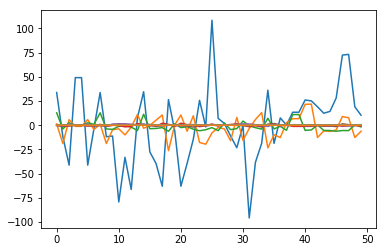

In [198]:
plt.plot(datapca[:50])
plt.show()

# Model Train and prediction

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [211]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve

In [41]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [200]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 
          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [201]:
y = data['quality']

In [215]:
X=datapca

In [214]:
X=datalda

NameError: name 'datalda' is not defined

In [216]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [217]:
lr = LogisticRegression()

In [218]:
lr.fit(X_train,y_train)

/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
y_pred_lr = lr.predict(X_test)

In [220]:
y_pred = lr.predict(X_train)

In [221]:
accuracy_score(y_pred,y_train)

0.8753062891369453

In [222]:
accuracy_score(y_pred_lr,y_test)

0.8865306122448979

In [223]:
confusion_matrix(y_test,y_pred_lr)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   1,  36,   0,   0,   0],
       [  0,   0, 364,   4,   0,   0],
       [  0,   0,   0, 544,   0,   0],
       [  0,   0,   0,  56, 177,   0],
       [  0,   0,   0,   0,  41,   0]])

In [224]:
classification_report(y_pred_lr,y_test)

/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         0\n           4       0.03      1.00      0.05         1\n           5       0.99      0.91      0.95       402\n           6       1.00      0.90      0.95       604\n           7       0.76      0.81      0.78       218\n           8       0.00      0.00      0.00         0\n\n   micro avg       0.89      0.89      0.89      1225\n   macro avg       0.46      0.60      0.46      1225\nweighted avg       0.95      0.89      0.92      1225\n'

In [225]:
tree = DecisionTreeClassifier()

In [226]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [227]:
accuracy_score(tree.predict(X_train),y_train)

1.0

In [228]:
accuracy_score(tree.predict(X_test),y_test)

0.9730612244897959

In [230]:
random_tree = RandomForestClassifier()

In [231]:
random_tree.fit(X_train,y_train)

/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [232]:
accuracy_score(random_tree.predict(X_train),y_train)

0.999455485978764

In [233]:
accuracy_score(random_tree.predict(X_test),y_test)

0.9706122448979592